In [1]:
###################################### IMPORTING LIBRARIES ###

import matplotlib.pyplot as plt
import uproot, yaml, sys, os
import seaborn as sns
import mplhep as hep
import awkward as ak
import pandas as pd
import numpy as np

from dotmap import DotMap

In [2]:
################################### LOADING CONFIGURATION ###

with open('../config/config.yaml') as conf_file:
    config = DotMap(yaml.load(conf_file, Loader=yaml.Loader))
    exec(config.plot_style.light)

In [22]:
############################################ LOADING DATA ###

output_path = '../data/outputs/'
processes = ['SIGNAL', 'BKG_ZZ', 'BKG_WZ', 'BKG_WW', 'BKG_tt']

for process in processes:
    try:
        globals()[f'W_LEPTON_PT_{process}'] = np.load(output_path + f'W_LEPTON_PT_{process}.npy')
        globals()[f'W_LEPTON_ETA_{process}'] = np.load(output_path + f'W_LEPTON_ETA_{process}.npy')
        globals()[f'Z_LEPTON_PT_{process}'] = np.load(output_path + f'Z_LEPTON_PT_{process}.npy')
        globals()[f'Z_LEPTON_ETA_{process}'] = np.load(output_path + f'Z_LEPTON_ETA_{process}.npy')
        globals()[f'FILTERED_MET_{process}'] = np.load(output_path + f'FILTERED_MET_{process}.npy')
        globals()[f'LEAD_LEPTON_PT_{process}'] = np.load(output_path + f'LEAD_LEPTON_PT_{process}.npy')
        globals()[f'SLEAD_LEPTON_PT_{process}'] = np.load(output_path + f'SLEAD_LEPTON_PT_{process}.npy')
        globals()[f'SSLEAD_LEPTON_PT_{process}'] = np.load(output_path + f'SSLEAD_LEPTON_PT_{process}.npy')
        globals()[f'TRANSVERSE_MASS_W_{process}'] = np.load(output_path + f'TRANSVERSE_MASS_W_{process}.npy')
        globals()[f'INVARIANT_MASS_Z_{process}'] = np.load(output_path + f'INVARIANT_MASS_Z_{process}.npy')
        globals()[f'TOTAL_ENERGY_{process}'] = np.load(output_path + f'TOTAL_ENERGY_{process}.npy')
    except: pass

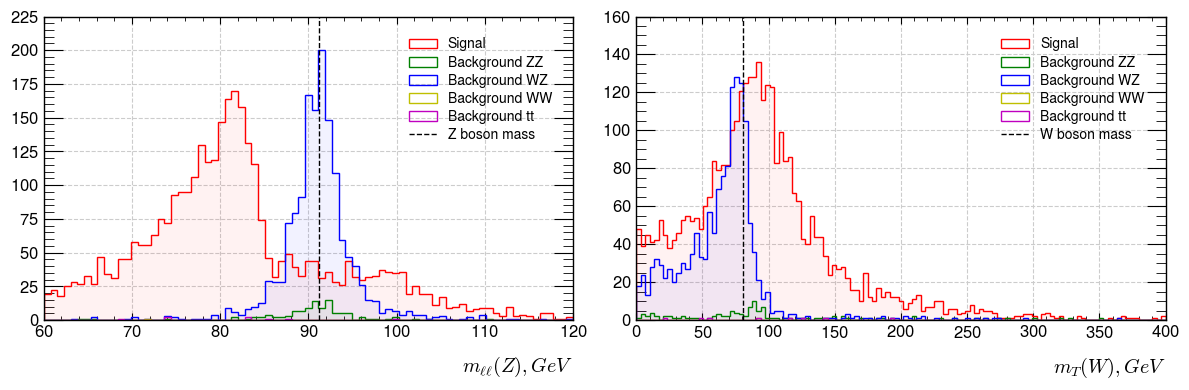

In [97]:
normalize = False

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

h, b, _ = ax1.hist(INVARIANT_MASS_Z_SIGNAL, bins=np.linspace(60, 120, 80), histtype='step', color='r', label='Signal', density=normalize)
ax1.fill_between(b[0:-1], h, step='post', color='r', alpha=0.05)
h, b, _ = ax1.hist(INVARIANT_MASS_Z_BKG_ZZ, bins=b, histtype='step', color='g', label='Background ZZ', density=normalize)
ax1.fill_between(b[0:-1], h, step='post', color='g', alpha=0.05)
h, b, _ = ax1.hist(INVARIANT_MASS_Z_BKG_WZ, bins=b, histtype='step', color='b', label='Background WZ', density=normalize)
ax1.fill_between(b[0:-1], h, step='post', color='b', alpha=0.05)
h, b, _ = ax1.hist(INVARIANT_MASS_Z_BKG_WW, bins=b, histtype='step', color='y', label='Background WW', density=normalize)
ax1.fill_between(b[0:-1], h, step='post', color='y', alpha=0.05)
h, b, _ = ax1.hist(INVARIANT_MASS_Z_BKG_tt, bins=b, histtype='step', color='m', label='Background tt', density=normalize)
ax1.fill_between(b[0:-1], h, step='post', color='m', alpha=0.05)
ax1.axvline(config.mass.Zboson, color='k', ls='--', label='Z boson mass', lw=1)
ax1.set_xlabel(r'$m_{\ell\ell}(Z), GeV$')
#ax1.axvline(96.688)
ax1.legend()

h, b, _ = plt.hist(TRANSVERSE_MASS_W_SIGNAL, bins=np.linspace(0, 400, 80), histtype='step', color='r', label='Signal', density=normalize)
plt.fill_between(b[0:-1], h, step='post', color='r', alpha=0.05)
h, b, _ = plt.hist(TRANSVERSE_MASS_W_BKG_ZZ, bins=b, histtype='step', color='g', label='Background ZZ', density=normalize)
plt.fill_between(b[0:-1], h, step='post', color='g', alpha=0.05)
h, b, _ = plt.hist(TRANSVERSE_MASS_W_BKG_WZ, bins=b, histtype='step', color='b', label='Background WZ', density=normalize)
plt.fill_between(b[0:-1], h, step='post', color='b', alpha=0.05)
h, b, _ = plt.hist(TRANSVERSE_MASS_W_BKG_WW, bins=b, histtype='step', color='y', label='Background WW', density=normalize)
plt.fill_between(b[0:-1], h, step='post', color='y', alpha=0.05)
h, b, _ = plt.hist(TRANSVERSE_MASS_W_BKG_tt, bins=b, histtype='step', color='m', label='Background tt', density=normalize)
plt.fill_between(b[0:-1], h, step='post', color='m', alpha=0.05)
plt.axvline(config.mass.Wboson, color='k', ls='--', label='W boson mass', lw=1)
plt.xlabel(r'$m_{T}(W), GeV$')
#plt.yscale('log')
plt.legend()
#plt.axvline(96.688)

plt.tight_layout()
#plt.savefig('../../../Desktop/WZ_reco.png', format='png')

plt.show()

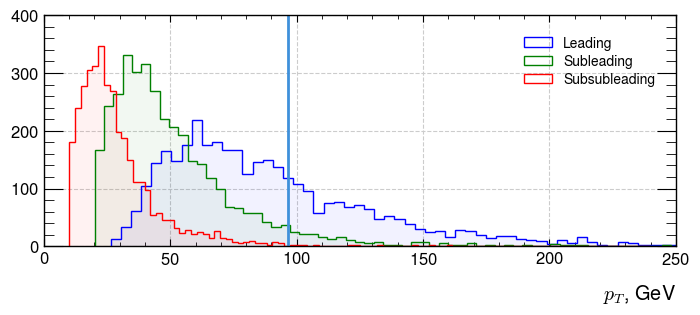

In [38]:
normalize = False

h, b, _ = plt.hist(LEAD_LEPTON_PT_SIGNAL, bins=100, histtype='step', color='b', label='Leading', density=normalize)
plt.fill_between(b[0:-1], h, step='post', color='b', alpha=0.05)
h, b, _ = plt.hist(SLEAD_LEPTON_PT_SIGNAL, bins=100, histtype='step', color='g', label='Subleading', density=normalize)
plt.fill_between(b[0:-1], h, step='post', color='g', alpha=0.05)
h, b, _ = plt.hist(SSLEAD_LEPTON_PT_SIGNAL, bins=100, histtype='step', color='r', label='Subsubleading', density=normalize)
plt.fill_between(b[0:-1], h, step='post', color='r', alpha=0.05)
plt.xlabel(r'$p_T$, GeV')
plt.legend()
plt.axvline(96.688)
plt.xlim(0, 250)
plt.show()

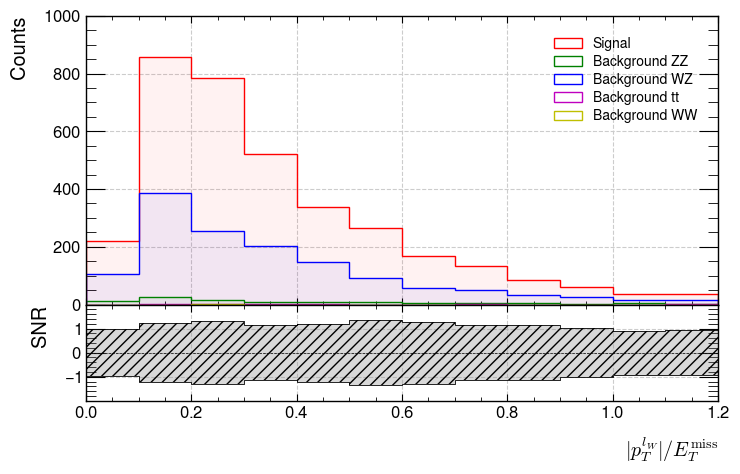

In [154]:
normalize = False

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5), gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0)

bins = np.linspace(0, 1.2, 13)

hs, bs, _ = ax1.hist(W_LEPTON_PT_SIGNAL/FILTERED_MET_SIGNAL, bins=bins, histtype='stepfilled', color='r', density=normalize, alpha=0.05)
ax1.hist(W_LEPTON_PT_SIGNAL/FILTERED_MET_SIGNAL, bins=bins, histtype='step', color='r', density=normalize, label='Signal')
h1, b1, _ = ax1.hist(W_LEPTON_PT_BKG_ZZ/FILTERED_MET_BKG_ZZ, bins=bins, histtype='stepfilled', color='g', density=normalize, alpha=0.05)
ax1.hist(W_LEPTON_PT_BKG_ZZ/FILTERED_MET_BKG_ZZ, bins=bins, histtype='step', color='g', density=normalize, label='Background ZZ')
h2, b2, _ = ax1.hist(W_LEPTON_PT_BKG_WZ/FILTERED_MET_BKG_WZ, bins=bins, histtype='stepfilled', color='b', density=normalize, alpha=0.05)
ax1.hist(W_LEPTON_PT_BKG_WZ/FILTERED_MET_BKG_WZ, bins=bins, histtype='step', color='b', density=normalize, label='Background WZ')
h4, b4, _ = ax1.hist(W_LEPTON_PT_BKG_tt/FILTERED_MET_BKG_tt, bins=bins, histtype='stepfilled', color='m', density=normalize, alpha=0.05)
ax1.hist(W_LEPTON_PT_BKG_tt/FILTERED_MET_BKG_tt, bins=bins, histtype='step', color='m', density=normalize, label='Background tt')
h3, b3, _ = ax1.hist(W_LEPTON_PT_BKG_WW/FILTERED_MET_BKG_WW, bins=bins, histtype='stepfilled', color='y', density=normalize, alpha=0.05)
ax1.hist(W_LEPTON_PT_BKG_WW/FILTERED_MET_BKG_WW, bins=bins, histtype='step', color='y', density=normalize, label='Background WW')

ax1.legend(loc=1)
ax1.set_ylabel('Counts')

h_bkg = h1 + h2 + h3 + h4
SNR = hs / h_bkg

SNR = np.append(SNR, SNR[-1])
SNR_ = 0.25 * (SNR[:-1] + SNR[1:])

ax2.bar(bins[:-1], SNR_, width=(bins[1] - bins[0]), color='grey', align='edge', alpha=0.3, hatch='///')
ax2.bar(bins[:-1], -SNR_, width=(bins[1] - bins[0]), color='grey', align='edge', alpha=0.3, hatch='///')
ax2.axhline(0, ls='--', color='k', lw=0.5)

SNR_ = np.append(SNR_, SNR_[-1])
ax2.step(bins, SNR_, where='post', zorder=10, color='k', lw=0.6)
ax2.step(bins, -SNR_, where='post', zorder=10, color='k', lw=0.6)
ax2.set_xlabel(r'$|p_T^{l_W}| / E_T^\text{miss}$')
ax2.set_ylim(-2, 2)
ax2.set_yticks([-1, 0, 1])
ax2.set_ylabel('SNR')

plt.show()

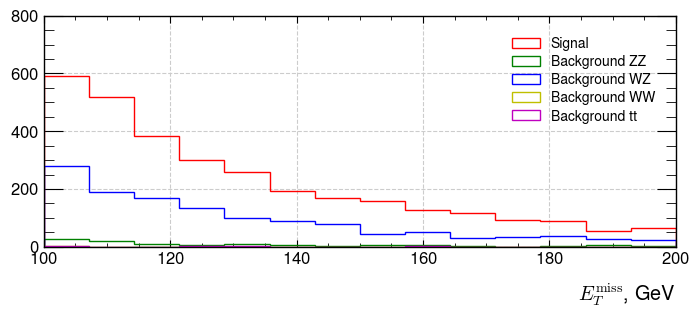

In [123]:
normalize = False

bins = np.linspace(100, 200, 15)

plt.hist(FILTERED_MET_SIGNAL, bins=bins, histtype='step', color='r', label='Signal', density=normalize)
plt.hist(FILTERED_MET_BKG_ZZ, bins=bins, histtype='step', color='g', label='Background ZZ', density=normalize)
plt.hist(FILTERED_MET_BKG_WZ, bins=bins, histtype='step', color='b', label='Background WZ', density=normalize)
plt.hist(FILTERED_MET_BKG_WW, bins=bins, histtype='step', color='y', label='Background WW', density=normalize)
plt.hist(FILTERED_MET_BKG_tt, bins=bins, histtype='step', color='m', label='Background tt', density=normalize)
plt.xlabel(r'$E_{T}^\text{miss}$, GeV')
#plt.yscale('log')
plt.legend()
plt.show()

Entries: 3585


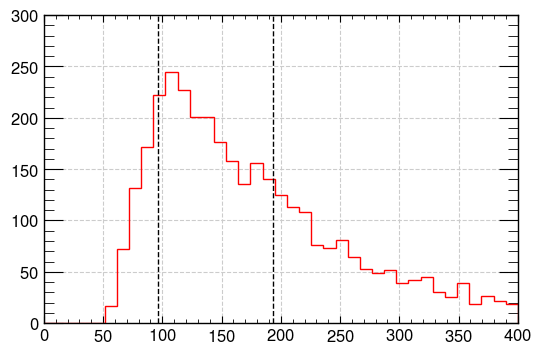

Entries: 3585


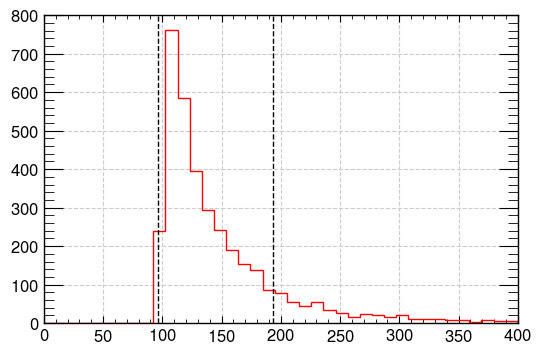

In [54]:
fig, ax = plt.subplots(figsize=(6, 4))

b = np.linspace(0, 400, 40)

print(f'Entries: {len(TOTAL_ENERGY_SIGNAL)}')

h1, b1, _ = plt.hist(TOTAL_ENERGY_SIGNAL, bins=b, histtype='step', color='r', label='total ET', density=False)
plt.axvline(96.688, lw=1, ls='--', color='k')
plt.axvline(2*96.688, lw=1, ls='--', color='k')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))

print(f'Entries: {len(FILTERED_MET_SIGNAL)}')

h1, b1, _ = plt.hist(FILTERED_MET_SIGNAL, bins=b, histtype='step', color='r', label='total ET', density=False)
plt.axvline(96.688, lw=1, ls='--', color='k')
plt.axvline(2*96.688, lw=1, ls='--', color='k')
plt.show()

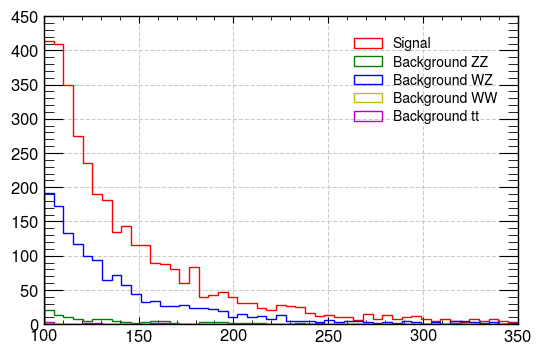

/tmp/ipykernel_180992/4191649576.py:21: RuntimeWarning: divide by zero encountered in divide
  SNR = h1 / (h2 + h3 + h4 + h5)


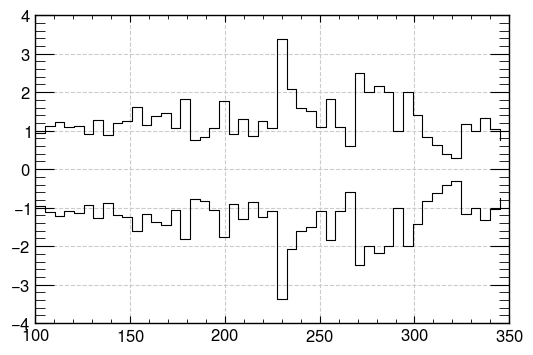

In [217]:
normalize = False

fig, ax = plt.subplots(figsize=(6, 4))

b = np.linspace(0, 200, 50) # -> 50 bins beween 50 & 300 - trans mass
b = np.linspace(50, 120, 50) # inv mass
b = np.linspace(100, 350, 50) # miss et


h1, b, _ = plt.hist(FILTERED_MET_SIGNAL, bins=b, histtype='step', color='r', label='Signal', density=normalize)
h2, b, _ = plt.hist(FILTERED_MET_BKG_ZZ, bins=b, histtype='step', color='g', label='Background ZZ', density=normalize)
h3, b, _ = plt.hist(FILTERED_MET_BKG_WZ, bins=b, histtype='step', color='b', label='Background WZ', density=normalize)
h4, b, _ = plt.hist(FILTERED_MET_BKG_WW, bins=b, histtype='step', color='y', label='Background WW', density=normalize)
h5, b, _ = plt.hist(FILTERED_MET_BKG_tt, bins=b, histtype='step', color='m', label='Background tt', density=normalize)

plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))

SNR = h1 / (h2 + h3 + h4 + h5)

for i, v in enumerate(SNR):
    if v in [np.nan, np.inf, -np.inf]:
        SNR[i] = 0.5 * (SNR[i-1] + SNR[i+1])

SNR = np.nan_to_num(SNR, nan=0, posinf=0, neginf=0)
#SNR = SNR / SNR.max()

#plt.bar(b[:-1], SNR, color='r', label='Signal', width=(b[-1]-b[0])/len(b))#, where='post', lw=0.8)
plt.step(b[:-1], SNR*0.5, color='k', label='Signal', where='post', lw=0.8)
plt.step(b[:-1], -SNR*0.5, color='k', label='Signal', where='post', lw=0.8)
#plt.axvline(96.688, lw=1, ls='--', color='k')
#plt.scatter(b[:-1], savgol_filter(SNR, len(SNR), 10), color='b')


plt.show()

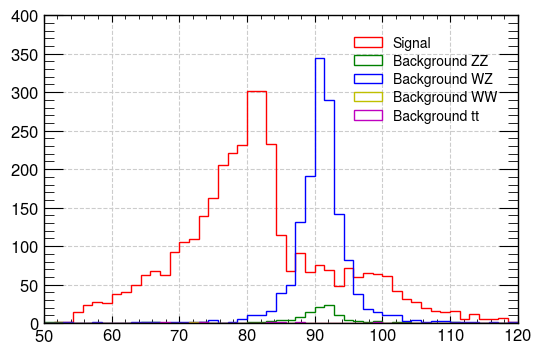

/tmp/ipykernel_180992/3515620772.py:20: RuntimeWarning: divide by zero encountered in divide
  SNR = h1 / (h2 + h3 + h4 + h5)


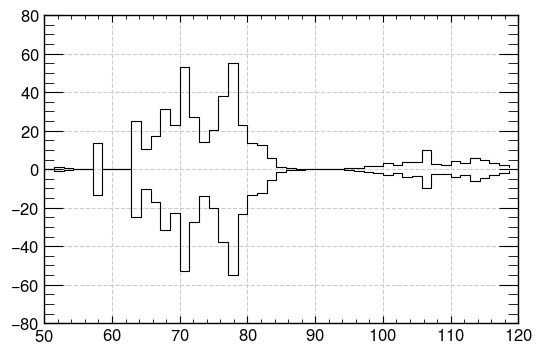

In [218]:
normalize = False

fig, ax = plt.subplots(figsize=(6, 4))

b = np.linspace(0, 200, 50) # -> 50 bins beween 50 & 300 - trans mass
b = np.linspace(50, 120, 50) # inv mass


h1, b, _ = plt.hist(INVARIANT_MASS_Z_SIGNAL, bins=b, histtype='step', color='r', label='Signal', density=normalize)
h2, b, _ = plt.hist(INVARIANT_MASS_Z_BKG_ZZ, bins=b, histtype='step', color='g', label='Background ZZ', density=normalize)
h3, b, _ = plt.hist(INVARIANT_MASS_Z_BKG_WZ, bins=b, histtype='step', color='b', label='Background WZ', density=normalize)
h4, b, _ = plt.hist(INVARIANT_MASS_Z_BKG_WW, bins=b, histtype='step', color='y', label='Background WW', density=normalize)
h5, b, _ = plt.hist(INVARIANT_MASS_Z_BKG_tt, bins=b, histtype='step', color='m', label='Background tt', density=normalize)

plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))

SNR = h1 / (h2 + h3 + h4 + h5)

for i, v in enumerate(SNR):
    if v in [np.nan, np.inf, -np.inf]:
        SNR[i] = 0.5 * (SNR[i-1] + SNR[i+1])

SNR = np.nan_to_num(SNR, nan=0, posinf=0, neginf=0)
#SNR = SNR / SNR.max()

#plt.bar(b[:-1], SNR, color='r', label='Signal', width=(b[-1]-b[0])/len(b))#, where='post', lw=0.8)
plt.step(b[:-1], SNR*0.5, color='k', label='Signal', where='post', lw=0.8)
plt.step(b[:-1], -SNR*0.5, color='k', label='Signal', where='post', lw=0.8)
#plt.axvline(96.688, lw=1, ls='--', color='k')
#plt.scatter(b[:-1], savgol_filter(SNR, len(SNR), 10), color='b')


plt.show()

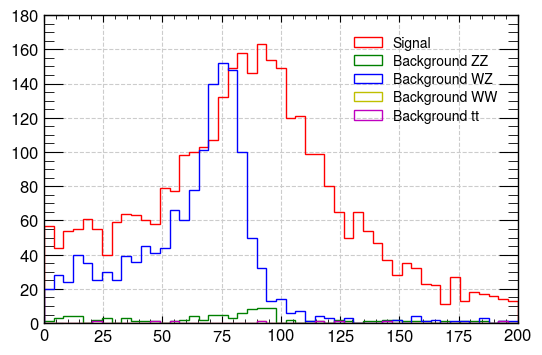

/tmp/ipykernel_180992/1650590502.py:19: RuntimeWarning: divide by zero encountered in divide
  SNR = h1 / (h2 + h3 + h4 + h5)


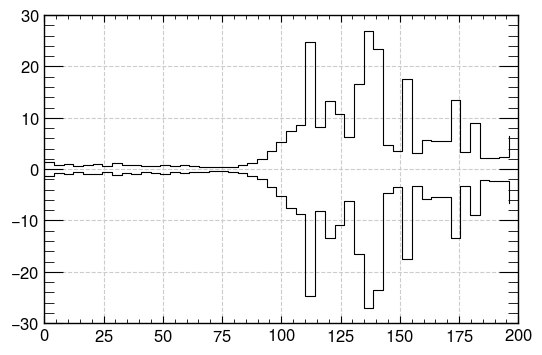

In [219]:
normalize = False

fig, ax = plt.subplots(figsize=(6, 4))

b = np.linspace(0, 200, 50) # -> 50 bins beween 50 & 300 - trans mass


h1, b, _ = plt.hist(TRANSVERSE_MASS_W_SIGNAL, bins=b, histtype='step', color='r', label='Signal', density=normalize)
h2, b, _ = plt.hist(TRANSVERSE_MASS_W_BKG_ZZ, bins=b, histtype='step', color='g', label='Background ZZ', density=normalize)
h3, b, _ = plt.hist(TRANSVERSE_MASS_W_BKG_WZ, bins=b, histtype='step', color='b', label='Background WZ', density=normalize)
h4, b, _ = plt.hist(TRANSVERSE_MASS_W_BKG_WW, bins=b, histtype='step', color='y', label='Background WW', density=normalize)
h5, b, _ = plt.hist(TRANSVERSE_MASS_W_BKG_tt, bins=b, histtype='step', color='m', label='Background tt', density=normalize)

plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))

SNR = h1 / (h2 + h3 + h4 + h5)

for i, v in enumerate(SNR):
    if v in [np.nan, np.inf, -np.inf]:
        SNR[i] = 0.5 * (SNR[i-1] + SNR[i+1])

SNR = np.nan_to_num(SNR, nan=0, posinf=0, neginf=0)
#SNR = SNR / SNR.max()

#plt.bar(b[:-1], SNR, color='r', label='Signal', width=(b[-1]-b[0])/len(b))#, where='post', lw=0.8)
plt.step(b[:-1], SNR*0.5, color='k', label='Signal', where='post', lw=0.8)
plt.step(b[:-1], -SNR*0.5, color='k', label='Signal', where='post', lw=0.8)
#plt.axvline(96.688, lw=1, ls='--', color='k')
#plt.scatter(b[:-1], savgol_filter(SNR, len(SNR), 10), color='b')


plt.show()

/tmp/ipykernel_180992/3086923407.py:20: RuntimeWarning: divide by zero encountered in divide
  SNR = h1 / (h2 + h3 + h4 + h5)
/tmp/ipykernel_180992/3086923407.py:55: RuntimeWarning: divide by zero encountered in divide
  SNR = h1 / (h2 + h3 + h4 + h5)
/tmp/ipykernel_180992/3086923407.py:90: RuntimeWarning: divide by zero encountered in divide
  SNR = h1 / (h2 + h3 + h4 + h5)


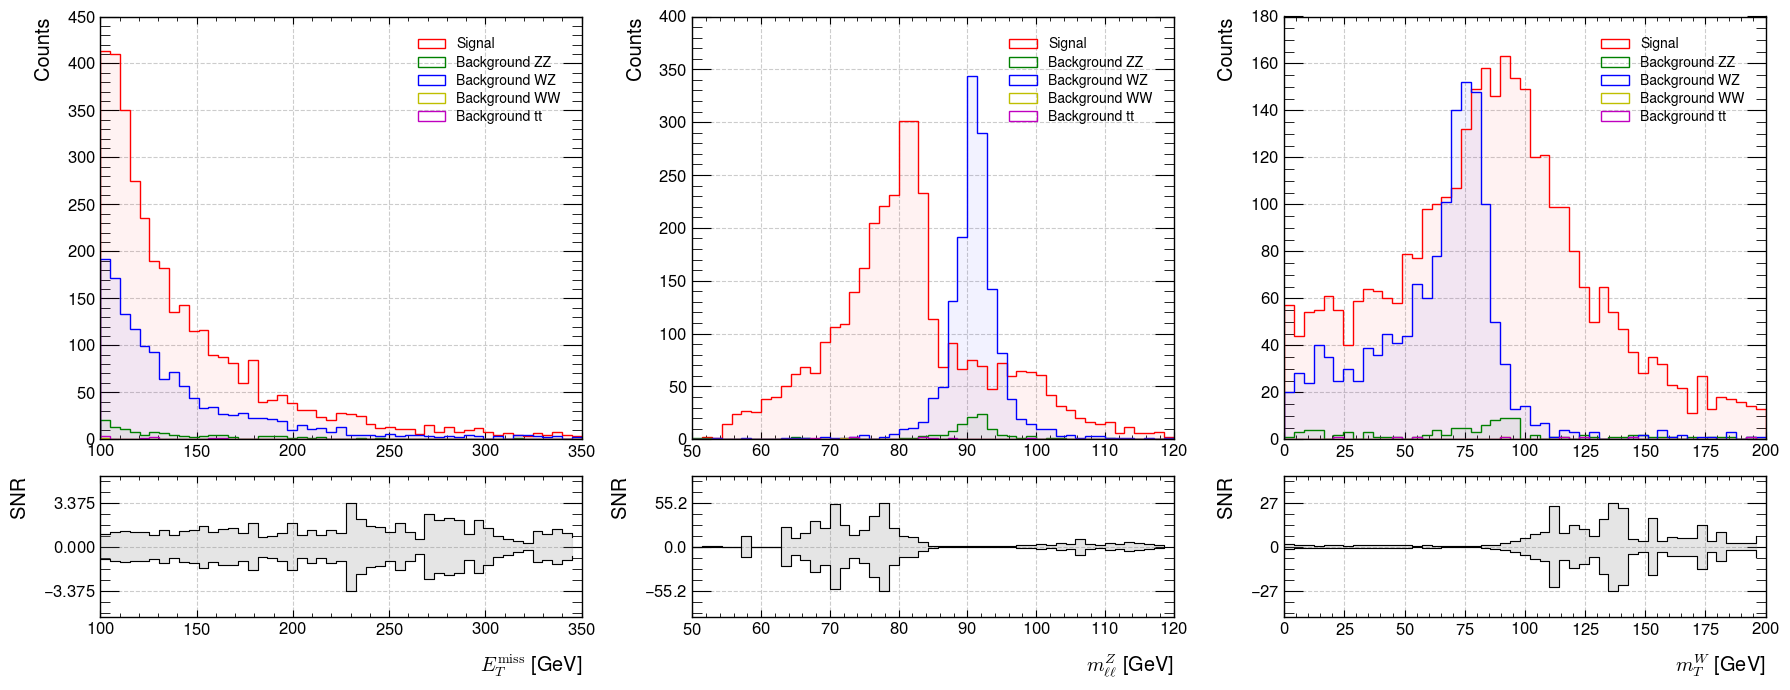

In [261]:
fig, ax = plt.subplots(2, 3, figsize=(18, 7), sharex=0,  gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0)


b = np.linspace(100, 350, 50) # miss et

h1, b, _ = ax[0][0].hist(FILTERED_MET_SIGNAL, bins=b, histtype='step', color='r', label='Signal', density=normalize)
ax[0][0].hist(FILTERED_MET_SIGNAL, bins=b, histtype='stepfilled', color='r', density=normalize, alpha=0.05)
h2, b, _ = ax[0][0].hist(FILTERED_MET_BKG_ZZ, bins=b, histtype='step', color='g', label='Background ZZ', density=normalize)
ax[0][0].hist(FILTERED_MET_BKG_ZZ, bins=b, histtype='stepfilled', color='g', density=normalize, alpha=0.05)
h3, b, _ = ax[0][0].hist(FILTERED_MET_BKG_WZ, bins=b, histtype='step', color='b', label='Background WZ', density=normalize)
ax[0][0].hist(FILTERED_MET_BKG_WZ, bins=b, histtype='stepfilled', color='b', density=normalize, alpha=0.05)
h4, b, _ = ax[0][0].hist(FILTERED_MET_BKG_WW, bins=b, histtype='step', color='y', label='Background WW', density=normalize)
ax[0][0].hist(FILTERED_MET_BKG_WW, bins=b, histtype='stepfilled', color='y', density=normalize, alpha=0.05)
h5, b, _ = ax[0][0].hist(FILTERED_MET_BKG_tt, bins=b, histtype='step', color='m', label='Background tt', density=normalize)
ax[0][0].hist(FILTERED_MET_BKG_tt, bins=b, histtype='stepfilled', color='m', density=normalize, alpha=0.05)

ax[0][0].legend()

SNR = h1 / (h2 + h3 + h4 + h5)
for i, v in enumerate(SNR):
    if v in [np.nan, np.inf, -np.inf]:
        SNR[i] = 0.5 * (SNR[i-1] + SNR[i+1])
SNR = np.nan_to_num(SNR, nan=0, posinf=0, neginf=0)

ax[1][0].step(b[:-1], SNR*0.5, color='k', where='post', lw=0.8)
ax[1][0].step(b[:-1], -SNR*0.5, color='k', where='post', lw=0.8)
ax[1][0].fill_between(b[:-1], -SNR*0.5, SNR*0.5, color='gray', alpha=0.2, step='post')
ax[1][0].set_yticks([-np.max(SNR*0.5), 0, np.max(SNR*0.5)])
ax[1][0].set_ylim(-np.max(SNR)*0.8, np.max(SNR)*0.8)

ax[0][0].set_ylabel('Counts')
ax[1][0].set_ylabel('SNR')
ax[1][0].set_xlabel(r'$E_T^\text{miss}$ [GeV]')





b = np.linspace(50, 120, 50) # inv mass

h1, b, _ = ax[0][1].hist(INVARIANT_MASS_Z_SIGNAL, bins=b, histtype='step', color='r', label='Signal', density=normalize)
ax[0][1].hist(INVARIANT_MASS_Z_SIGNAL, bins=b, histtype='stepfilled', color='r', density=normalize, alpha=0.05)
h2, b, _ = ax[0][1].hist(INVARIANT_MASS_Z_BKG_ZZ, bins=b, histtype='step', color='g', label='Background ZZ', density=normalize)
ax[0][1].hist(INVARIANT_MASS_Z_BKG_ZZ, bins=b, histtype='stepfilled', color='g', density=normalize, alpha=0.05)
h3, b, _ = ax[0][1].hist(INVARIANT_MASS_Z_BKG_WZ, bins=b, histtype='step', color='b', label='Background WZ', density=normalize)
ax[0][1].hist(INVARIANT_MASS_Z_BKG_WZ, bins=b, histtype='stepfilled', color='b', density=normalize, alpha=0.05)
h4, b, _ = ax[0][1].hist(INVARIANT_MASS_Z_BKG_WW, bins=b, histtype='step', color='y', label='Background WW', density=normalize)
ax[0][1].hist(INVARIANT_MASS_Z_BKG_WW, bins=b, histtype='stepfilled', color='y', density=normalize, alpha=0.05)
h5, b, _ = ax[0][1].hist(INVARIANT_MASS_Z_BKG_tt, bins=b, histtype='step', color='m', label='Background tt', density=normalize)
ax[0][1].hist(INVARIANT_MASS_Z_BKG_tt, bins=b, histtype='stepfilled', color='m', density=normalize, alpha=0.05)

ax[0][1].legend()

SNR = h1 / (h2 + h3 + h4 + h5)
for i, v in enumerate(SNR):
    if v in [np.nan, np.inf, -np.inf]:
        SNR[i] = 0.5 * (SNR[i-1] + SNR[i+1])
SNR = np.nan_to_num(SNR, nan=0, posinf=0, neginf=0)

ax[1][1].step(b[:-1], SNR*0.5, color='k', where='post', lw=0.8)
ax[1][1].step(b[:-1], -SNR*0.5, color='k', where='post', lw=0.8)
ax[1][1].fill_between(b[:-1], -SNR*0.5, SNR*0.5, color='gray', alpha=0.2, step='post')
ax[1][1].set_yticks([-np.max(SNR*0.5), 0, np.max(SNR*0.5)])
ax[1][1].set_ylim(-np.max(SNR)*0.8, np.max(SNR)*0.8)

ax[0][1].set_ylabel('Counts')
ax[1][1].set_ylabel('SNR')
ax[1][1].set_xlabel(r'$m_{\ell\ell}^{Z}$ [GeV]')





b = np.linspace(0, 200, 50) # trans mass

h1, b, _ = ax[0][2].hist(TRANSVERSE_MASS_W_SIGNAL, bins=b, histtype='step', color='r', label='Signal', density=normalize)
ax[0][2].hist(TRANSVERSE_MASS_W_SIGNAL, bins=b, histtype='stepfilled', color='r', density=normalize, alpha=0.05)
h2, b, _ = ax[0][2].hist(TRANSVERSE_MASS_W_BKG_ZZ, bins=b, histtype='step', color='g', label='Background ZZ', density=normalize)
ax[0][2].hist(TRANSVERSE_MASS_W_BKG_ZZ, bins=b, histtype='stepfilled', color='g', density=normalize, alpha=0.05)
h3, b, _ = ax[0][2].hist(TRANSVERSE_MASS_W_BKG_WZ, bins=b, histtype='step', color='b', label='Background WZ', density=normalize)
ax[0][2].hist(TRANSVERSE_MASS_W_BKG_WZ, bins=b, histtype='stepfilled', color='b', density=normalize, alpha=0.05)
h4, b, _ = ax[0][2].hist(TRANSVERSE_MASS_W_BKG_WW, bins=b, histtype='step', color='y', label='Background WW', density=normalize)
ax[0][2].hist(TRANSVERSE_MASS_W_BKG_WW, bins=b, histtype='stepfilled', color='y', density=normalize, alpha=0.05)
h5, b, _ = ax[0][2].hist(TRANSVERSE_MASS_W_BKG_tt, bins=b, histtype='step', color='m', label='Background tt', density=normalize)
ax[0][2].hist(TRANSVERSE_MASS_W_BKG_tt, bins=b, histtype='stepfilled', color='m', density=normalize, alpha=0.05)

ax[0][2].legend()

SNR = h1 / (h2 + h3 + h4 + h5)
for i, v in enumerate(SNR):
    if v in [np.nan, np.inf, -np.inf]:
        SNR[i] = 0.5 * (SNR[i-1] + SNR[i+1])
SNR = np.nan_to_num(SNR, nan=0, posinf=0, neginf=0)

ax[1][2].step(b[:-1], SNR*0.5, color='k', where='post', lw=0.8)
ax[1][2].step(b[:-1], -SNR*0.5, color='k', where='post', lw=0.8)
ax[1][2].fill_between(b[:-1], -SNR*0.5, SNR*0.5, color='gray', alpha=0.2, step='post')
ax[1][2].set_yticks([-np.max(SNR*0.5), 0, np.max(SNR*0.5)])
ax[1][2].set_ylim(-np.max(SNR)*0.8, np.max(SNR)*0.8)

ax[0][2].set_ylabel('Counts')
ax[1][2].set_ylabel('SNR')
ax[1][2].set_xlabel(r'$m_T^{W}$ [GeV]')


plt.tight_layout()

plt.savefig('../../../Desktop/SNR.png', format='png')
#plt.show()

In [1]:
from sympy import *

In [2]:
a, b, P, V, n, R, T = symbols('a b P V n R T')

In [3]:
eq = Eq(
    P,
    R*T / (V/n - b) - a*n**2/V**2
)

eq

Eq(P, R*T/(V/n - b) - a*n**2/V**2)

In [16]:
simplify(solve(eq, T)[0])

P*V/(R*n) - P*b/R + a*n/(R*V) - a*b*n**2/(R*V**2)

In [17]:
simplify(diff(solve(eq, T)[0], P))

(V - b*n)/(R*n)